In [1]:
import pandas as pd
import numpy as np
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:

labels = pd.read_fwf("./UCI_HAR_Dataset/features.txt",header=None)
X_train = pd.read_fwf("./UCI_HAR_Dataset/train/X_train.txt",header=None)
X_train.columns = labels


y_train = pd.read_fwf("./UCI_HAR_Dataset/train/y_train.txt",header=None)
y_train = pd.Series(y_train[0])

X_test = pd.read_fwf("./UCI_HAR_Dataset/test/X_test.txt",header=None)
X_test.columns = labels

y_test = pd.read_fwf("./UCI_HAR_Dataset/test/y_test.txt",header=None)
y_test = pd.Series(y_test[0])

data = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

y = y.map({1:"WALKING",2:"WALKING_UPSTAIRS",3 : "WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LAYING"})


In [3]:
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i][0])
data.columns = cols
data.columns = data.columns.str.replace('\d+', '').str.lstrip()
data['activity'] = y

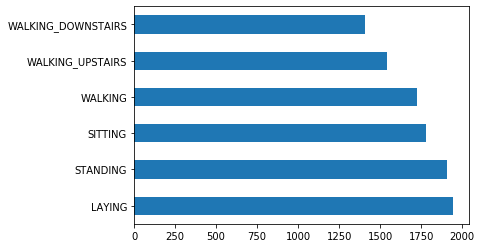

In [4]:
y.value_counts().plot(kind='barh')


In [5]:
data.isna().sum().sum()

0

In [6]:
a = pd.Series(data.columns).str.contains('Gyro')
data_gyro = data[data.columns[a]]

In [7]:
b = pd.Series(data.columns).str.contains('Acc')
data_acc = data[data.columns[b]]

In [8]:
data_gyro.columns.intersection(data_acc.columns) #Wiec jest gitara

Index([], dtype='object')

In [9]:
angle = data.columns.difference(data_gyro.columns.union(data_acc.columns))
c = pd.Series(data.columns).str.contains('angle')
data_angle = data[data.columns[c]].iloc[:,[4,5,6]]


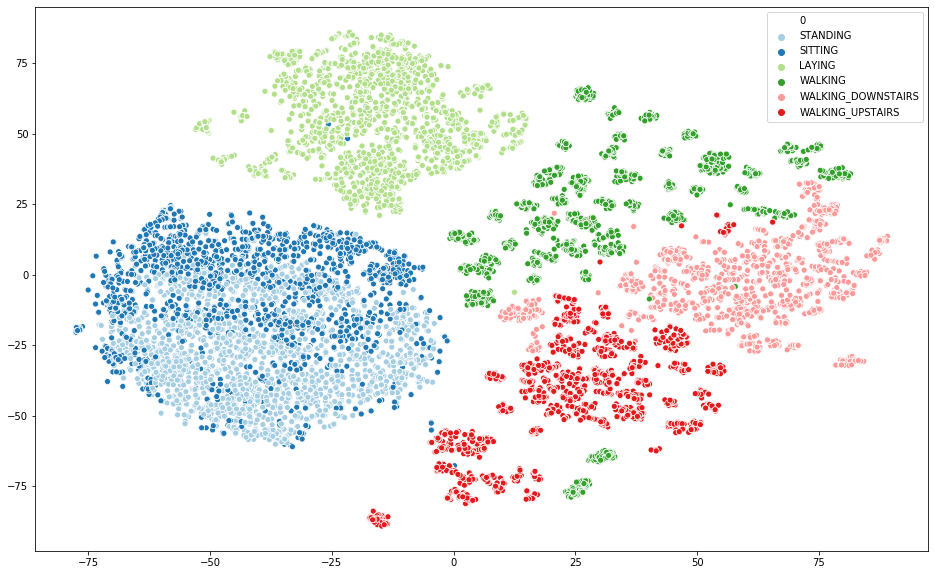

In [10]:
tsne_data = data.copy()
tsne_data.pop('activity')
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)

fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.scatterplot(tsne_transformed[:,0],tsne_transformed[:,1],hue=y,palette='Paired')

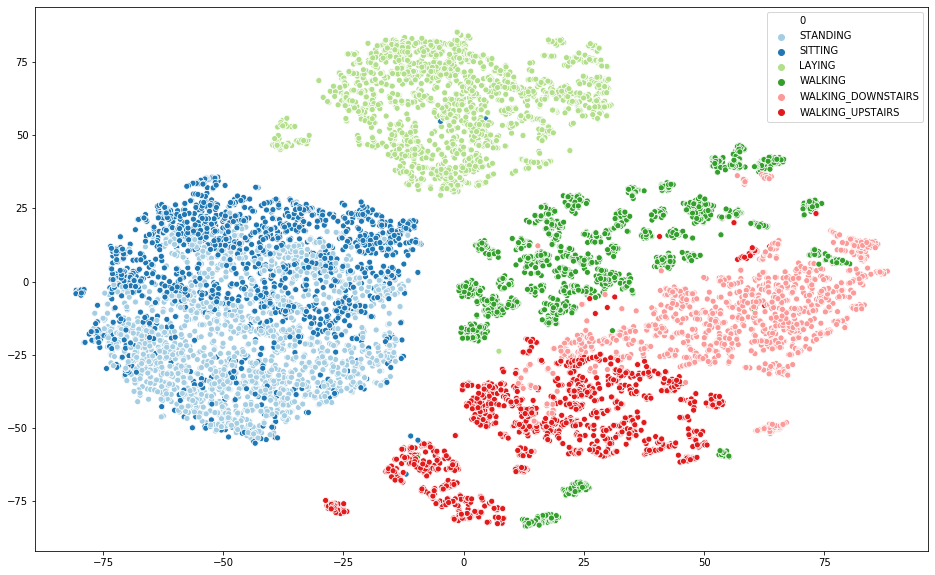

In [11]:
tsne_data = data.copy()
tsne_data.pop('activity')


pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)

fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.scatterplot(tsne_transformed[:,0],tsne_transformed[:,1],hue=y,palette='Paired')

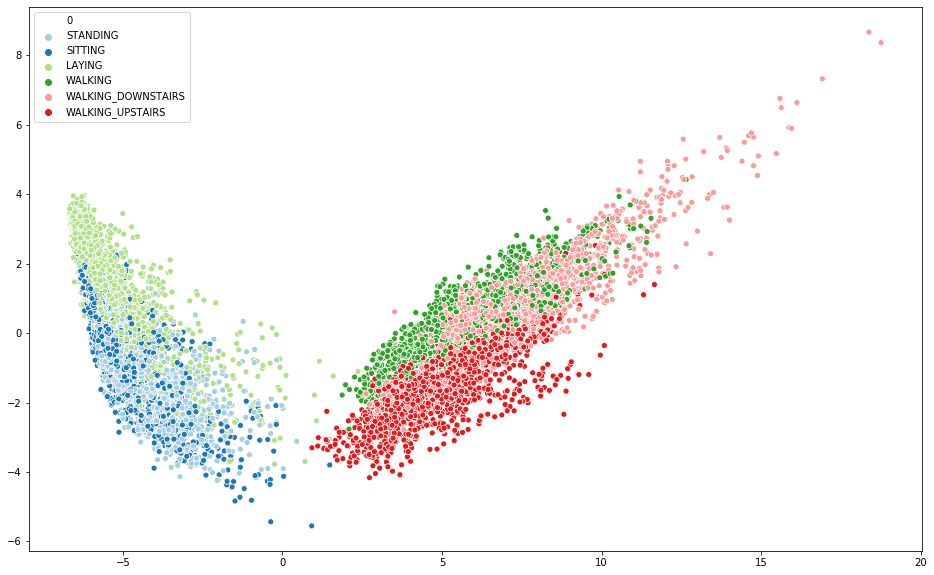

In [43]:
pca_data = data.copy()
pca_data.pop('activity')


pca = PCA(n_components=2, random_state=3)
pca_data = pca.fit_transform(pca_data)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.scatterplot(pca_data[:,0],pca_data[:,1],hue=y,palette='Paired')

Text(0, 0.5, 'cumulative explained variance')

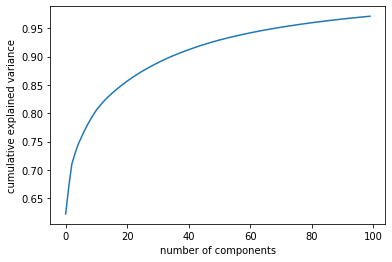

In [41]:
pca_data = data.copy()
pca_data.pop('activity')

pca = PCA(n_components=100,random_state=3)
pca_data = pca.fit_transform(pca_data)
cum_ratio = (np.cumsum(pca.explained_variance_ratio_))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

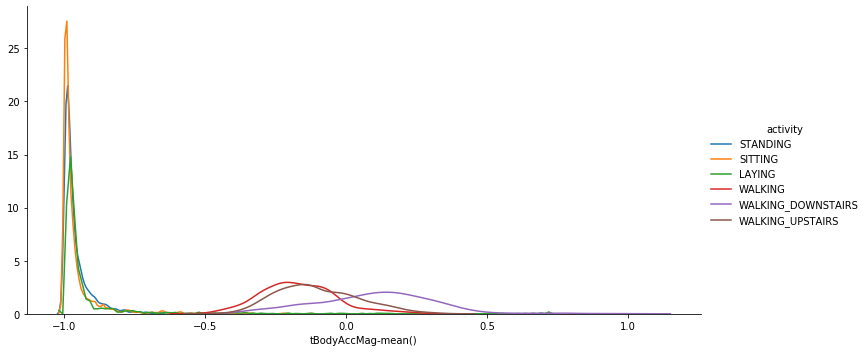

In [21]:
facetgrid = sns.FacetGrid(data_acc, hue='activity', height=5,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False).add_legend()

Text(0.5, 1.0, 'Boxplot of tBodyAccMag-mean() column across various activities')

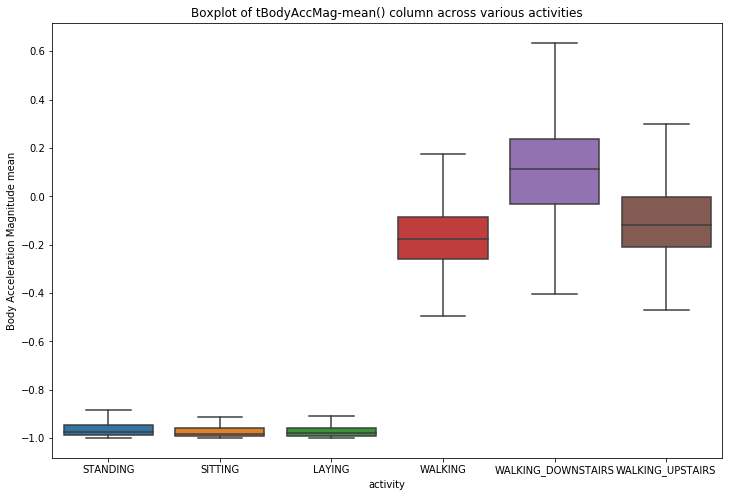

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(x='activity', y='tBodyAccMag-mean()',data=data_acc, showfliers=False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")

Text(0.5, 1.0, 'Box plot of angle(Y,gravityMean) column across various activities')

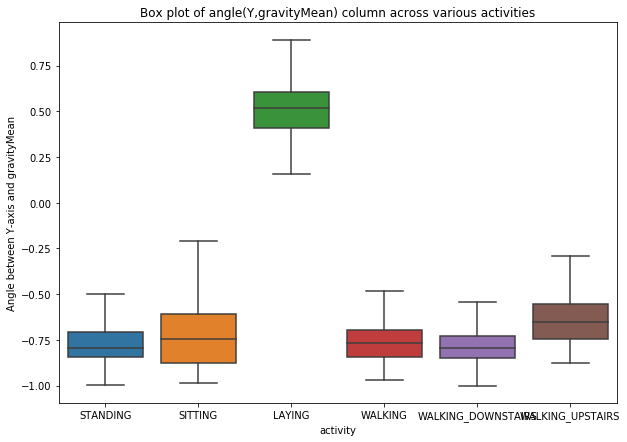

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(x='activity', y='angle(X,gravityMean)', data = data_acc, showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')

Text(0.5, 1.0, 'Box plot of angle(Y,gravityMean) column across various activities')

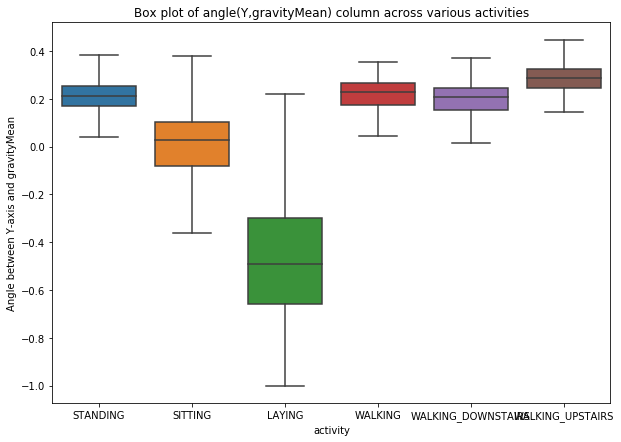

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(x='activity', y='angle(Y,gravityMean)', data = data_acc, showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')

Text(0.5, 1.0, 'Box plot of angle(Y,gravityMean) column across various activities')

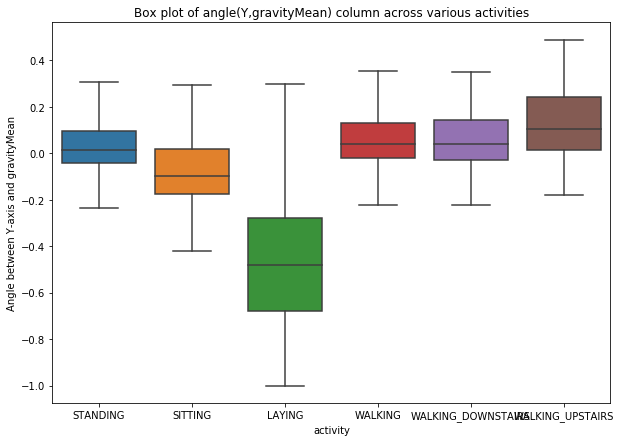

In [25]:
plt.figure(figsize=(10,7))
sns.boxplot(x='activity', y='angle(Z,gravityMean)', data = data_acc, showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')